In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, precision_recall_curve, f1_score

In [16]:
actual_a= [1 for i in range(10)] + [0 for i in range(10)]
predicted_a = [1 for i in range(9)] + [0,1,1] + [0 for i in range(8)]
print("{} - Actual values ".format(actual_a))
print("{} - Predicted values ".format(predicted_a))



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] - Actual values 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] - Predicted values 


In [17]:
TP= len([a for a,p in zip(actual_a, predicted_a) if a==p and p==1])
TN= len([a for a,p in zip(actual_a, predicted_a) if a==p and p==0])
FP= len([a for a,p in zip(actual_a, predicted_a) if a!=p and p==1])
FN= len([a for a,p in zip(actual_a, predicted_a) if a!=p and p==0])
print("[[{} {}], \n[{} {}]]".format(TN,FP,FN,TP))

[[8 2], 
[1 9]]


<AxesSubplot: >

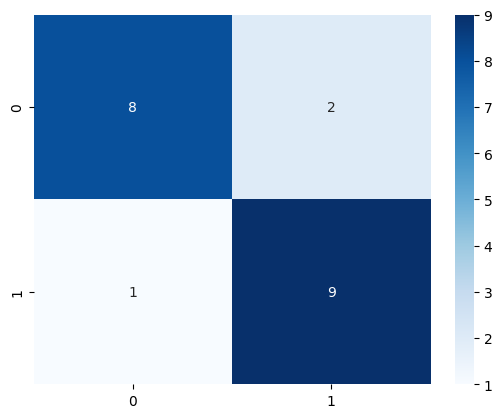

In [18]:
array =[[8,2], 
        [1,9]]
df=pd.DataFrame(array, range(2), range(2))
sns.heatmap(df, annot=True, cmap='Blues')


<AxesSubplot: >

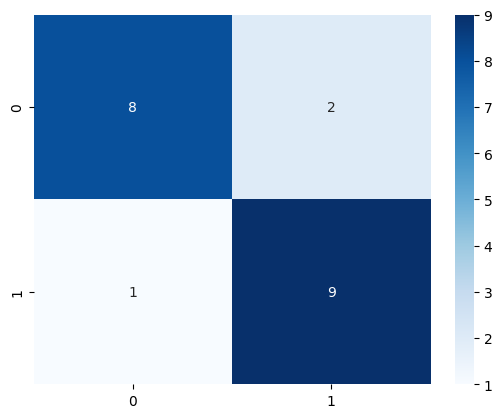

In [19]:
cm_df=confusion_matrix(actual_a,predicted_a)
sns.heatmap(cm_df, annot=True, cmap='Blues')


In [20]:
def my_accuracy_score(tn,fp,fn,tp):
    return (tn+tp)/(tn+tp+fn+fp)

def my_precision_score(tp,fp):
    return tp/(tp+fp)

def my_recall_score(tp,fn):
    return tp/(tp+fn)

def my_f1_score(tp,fp,fn):
    p=my_precision_score(tp,fp)
    r=my_recall_score(tp,fn)
    return (2*p*r)/(p+r)

In [21]:
print("My accuracy score= ", my_accuracy_score(TN,FP,FN,TP))
print("Sklearn accuracy score= ",accuracy_score(actual_a, predicted_a))
print("My precision score= ", my_precision_score(TP,FP))
print("Sklearn precision score= ",precision_score(actual_a, predicted_a))
print("My recall score= ", my_recall_score(TP,FN))
print("Sklearn recall score= ",recall_score(actual_a, predicted_a))
print("My f1 score= ", my_f1_score(TP,FP,FN))
print("Sklearn f1 score= ",f1_score(actual_a, predicted_a))


My accuracy score=  0.85
Sklearn accuracy score=  0.85
My precision score=  0.8181818181818182
Sklearn precision score=  0.8181818181818182
My recall score=  0.9
Sklearn recall score=  0.9
My f1 score=  0.8571428571428572
Sklearn f1 score=  0.8571428571428572


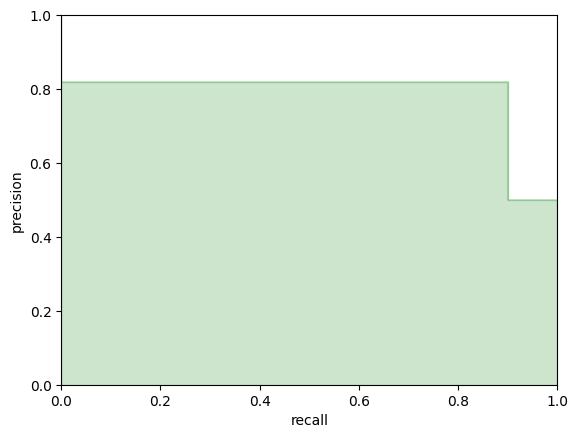

In [22]:
prec,rec,_=precision_recall_curve(actual_a, predicted_a)
plt.step(rec, prec, color='g', alpha=0.2, where='post')
plt.fill_between(rec, prec, color='g', alpha=0.2, step='post')
plt.xlabel('recall')
plt.ylabel('precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()


(0.0, 1.0)

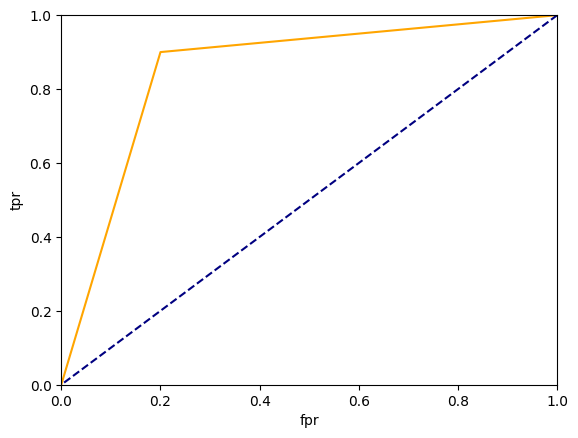

In [27]:
fpr,tpr,_=roc_curve(actual_a, predicted_a)
plt.plot(fpr, tpr, color='orange')
plt.plot([1,0],[1,0] ,color='navy', linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])